### <p style="text-align: right;"> &#9989; Put your name here.</p>

# PHY480 Day 5

## In-class assignment: Minimization/maximization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Task 1.** Program a function that evaluates the first and second derivatives for the function given below.

In [2]:
def f3( x ):
    return (x-1)*(x-2)*(x-3)


In [13]:
import sympy
x = sympy.Symbol('x')

deriv = sympy.diff((x-1)*(x-2)*(x-3), x)
dderiv = sympy.diff(deriv, x)

print(deriv, '\n', dderiv)

(x - 3)*(x - 2) + (x - 3)*(x - 1) + (x - 2)*(x - 1) 
 6*x - 12


In [110]:
def df3( x ):
    return (x - 3)*(x - 2) + (x - 3)*(x - 1) + (x - 2)*(x - 1) 


def ddf3( x ):
    return  6*x - 12


**Task 2.** Plot the function `f3` in the range $x\in[0,4]$, $y\in[-1,1]$. Find the location of the minimum and the maximum with pen and paper.

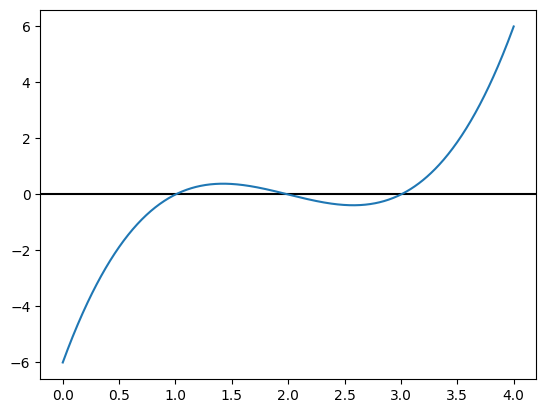

In [111]:
x = np.linspace(0, 4, 1000)

plt.axhline(0, color='black')
plt.plot(x, f3(x))

## Finding critical points with Newton-Raphson method

We can use the root finding method, i.e., $f(x)=0$ to find the critical points if we simply provide $g(x)\equiv f'(x)$. In that case, we also need $g'(x)\equiv f''(x)$.

**Task 3.** Use the Newton-Raphson method to find the minima and maxima, starting from the points $x_0$ given below. (I.e. give `df3` as the function and `ddf3` as the derivative in the arguments of the Newton-Raphson method.) Compare the numerical results to the ones that you computed analytically.

In [20]:
# list of starting points
x0list =  [-1, 0, 1, 1.5, 2, 2.5, 3 ]

In [23]:
# Newton-Raphson root finding method
# Input:
# fun -- function f(x)
# dfun -- derivative f'(x)
# x0 -- starting point
# tol -- tolerance, the search stops once |f(x)| is less than the tolerance
# max_iter -- maximum number of iterations
# Output:
# status -- =0, if the search was successful
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates

def root_newton_raphson( fun, dfun, x0, tol=1e-4, max_iter=100 ):
    xn = [x0]
    i = 0
    status = 1

    while abs(fun(xn[-1])) > tol or i == max_iter:
        if dfun(xn[-1]) == 0:
            i = max_iter
            break

        xn1 = xn[-1] - fun(xn[-1])/dfun(xn[-1])
        xn.append(xn1)
        i += 1
    
    if i != max_iter:
        status = 0

    return status, i, xn[-1], fun(xn[-1]), xn

x0 = 2 fails


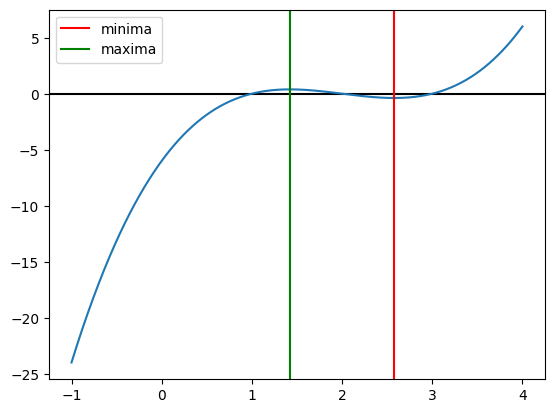

In [41]:

minima = []
maxima = []

for x0 in x0list:
    failure, i, x, x_eval, steps = root_newton_raphson(df3, ddf3, x0)
    if not failure:
        if ddf3(x) > 0:
            minima.append(x)
        else:
            maxima.append(x)
    else: print(f'x0 = {x0} fails')


x_space = np.linspace(-1, 4, 1000)

plt.axhline(0, color='black')
plt.plot(x_space, f3(x_space))
plt.axvline(minima[0], color='red', label='minima')
plt.axvline(maxima[0], color='green', label='maxima')
plt.legend();

## Minimization with the gradient descent method

A simple first-order minimization method is the gradient descent:

$$
x_{k+1}=x_k-\alpha f'(x_k).
$$

It requires only the first derivative, but may take many steps to converge. (For now we consider the step size $\alpha$ fixed.)


**Task 4.** Code the gradient descent minimization algorithm. Use it to find the minimum from the same given starting points $x_0$. And then use it to find the maximum from the same starting points. (Remember, flipping $f(x)$ to $-f(x)$ turns a maximization problem into a minimization problem.)

Experiment with the step size $\alpha$ in the range $[1/100,1/10]$. You may also need to increase the number of iterations `max_iter`, since the method may need to take many steps to converge, depending on the specified step size. Try to adjust the step size so that the number of iterations is minimal. Experiment with the `tol` parameter of, e.g., $10^{-6}$, $10^{-10}$, etc.

Check the location of the minimum and maximum that you found against the ones that you computed analytically.

In [135]:
# minimization with fixed step size gradient descent
# Input:
# fun -- function to be minimized
# dfun -- its derivative
# alpha -- step size
# tol -- minimization is stopped when |f'(x)| < tol
# max_iter -- bound on the number of iterations
# Output:
# status -- =0, if the search was successful
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates

def minimize_gradient_descent(dfun, x0, alpha=0.01, tol=1e-4, max_iter=100, maxima = False):
    status = 0
    i = 0


    steps = [x0]
    while abs(dfun(steps[-1])) > tol and i != max_iter:
        steps.append(steps[-1] - alpha*dfun(steps[-1])*(-1)**(maxima)) # negative dfun if flipped
        i += 1

    if i == max_iter:
        status = 1
    if steps[-1] == np.inf or steps[-1] == -np.inf:
        status = 2 # out of bounds error

    return status, steps[-1], i, steps

x0 = -1 fails minimum
x0 = 0 fails minimum
x0 = 1 fails minimum
x0 = 3 fails maximum


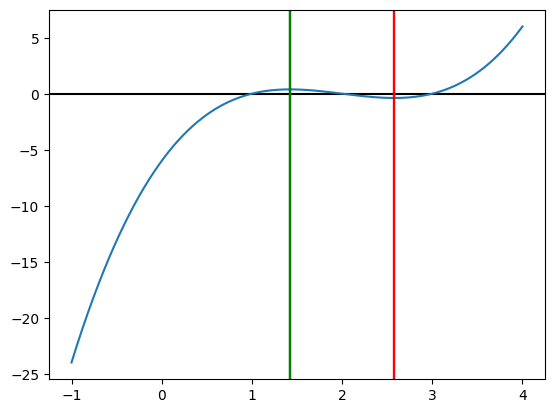

In [142]:

minima = []
maxima = []

for x0 in x0list:
    # minima
    failure, x, i, steps = minimize_gradient_descent(df3, x0, max_iter=1000)
    if not failure:
        minima.append(x)    
    else: print(f'x0 = {x0} fails minimum')

    # maxima
    failure, x, i, steps = minimize_gradient_descent(df3, x0, max_iter=1000, maxima=True)
    if not failure:
        maxima.append(x)    
    else: print(f'x0 = {x0} fails maximum')





x_space = np.linspace(-1, 4, 1000)

plt.axhline(0, color='black')
plt.plot(x_space, f3(x_space))
for minimum in minima:
    plt.axvline(minimum, color='red', label='minima')

for maximum in maxima:
    plt.axvline(maximum, color='green', label='minima')


&#169; Copyright 2025,  Michigan State University Board of Trustees